In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df = pd.read_csv("kenpom22.csv")

In [3]:
df.head(20)

Season             TeamName    Tempo  RankTempo  AdjTempo  RankAdjTempo  \
0     2022    Abilene Christian  71.1340         47   70.3257            37   
1     2022            Air Force  63.4280        347   63.2371           342   
2     2022                Akron  63.6546        343   62.0843           352   
3     2022              Alabama  73.2690         10   71.9053            11   
4     2022          Alabama A&M  68.3935        162   66.5795           212   
5     2022          Alabama St.  71.1919         45   69.4362            62   
6     2022               Albany  65.8294        292   65.1500           282   
7     2022           Alcorn St.  68.9565        123   67.7960           128   
8     2022             American  65.5956        301   64.9483           291   
9     2022      Appalachian St.  64.9815        328   64.4935           317   
10    2022              Arizona  72.7151         19   72.2291             9   
11    2022          Arizona St.  68.0421        175   67.3051           168   
12    2022             Arkansas  71.9230         31   70.6934            28   
13    2022  Arkansas Pine Bluff  68.9177        125   67.0841           185   
14    2022         Arkansas St.  68.8801        128   68.2648           110   
15    2022                 Army  69.2482        106   68.8158            89   
16    2022               Auburn  71.2739         42   70.1123            42   
17    2022          Austin Peay  65.8389        291   64.6405           313   
18    2022             Ball St.  71.6843         35   69.9459            46   
19    2022               Baylor  68.6022        144   67.3834           163   

          OE  RankOE     AdjOE  RankAdjOE        DE  RankDE     AdjDE  \
0   102.4850     166  104.0550        157   96.9711      59  100.6790   
1    92.9406     334   95.5363        306  104.3160     246  104.0210   
2   107.3680      55  105.6420        121   99.9099     124  102.0200   
3   108.5320      44  115.1820         16  104.2540     241   98.6141   
4    88.6957     354   87.3290        355   96.2221      45  100.8300   
5    96.2452     290   97.0883        283  105.4540     264  110.2780   
6    93.9074     325   92.2030        341   99.6633     122  102.6750   
7    95.8669     298   97.2850        279  102.5360     201  105.3790   
8    96.1552     292   94.3750        323  107.4350     291  110.5780   
9   100.2470     210  101.0490        211  100.2110     138  100.7920   
10  114.7370       6  118.5530          7   93.2650      18   92.5895   
11   94.5235     314  101.1640        207   97.2589      65   93.2269   
12  104.9450     112  109.8640         53   94.3263      26   90.3992   
13   93.8129     326   97.7822        269  114.5740     354  119.3020   
14   99.7506     220   99.8802        238   99.1659     104  101.0020   
15   98.9232     245   96.4516        295  102.7920     207  107.5700   
16  108.0110      47  112.6830         25   92.6285      10   89.4805   
17   93.7918     328   94.7914        318  104.0120     236  105.6220   
18  103.0100     155  101.4480        203  107.3990     289  109.8430   
19  111.5680      20  118.0220          8   92.7346      11   90.9821   

    RankAdjDE      AdjEM  RankAdjEM  
0         128   3.375700        131  
1         208  -8.484280        269  
2         158   3.622460        126  
3          92  16.567700         28  
4         130 -13.501100        314  
5         308 -13.189300        311  
6         172 -10.471500        286  
7         231  -8.093830        265  
8         317 -16.202900        331  
9         129   0.257211        166  
10         21  25.963400          5  
11         27   7.936670         97  
12         11  19.464300         18  
13        358 -21.519800        352  
14        133  -1.121540        181  
15        272 -11.118900        295  
16          9  23.202600         12  
17        235 -10.830300        291  
18        302  -8.394430        267  
19         13  27.039600          4

In [4]:
df = df.drop(columns = ['Season'])

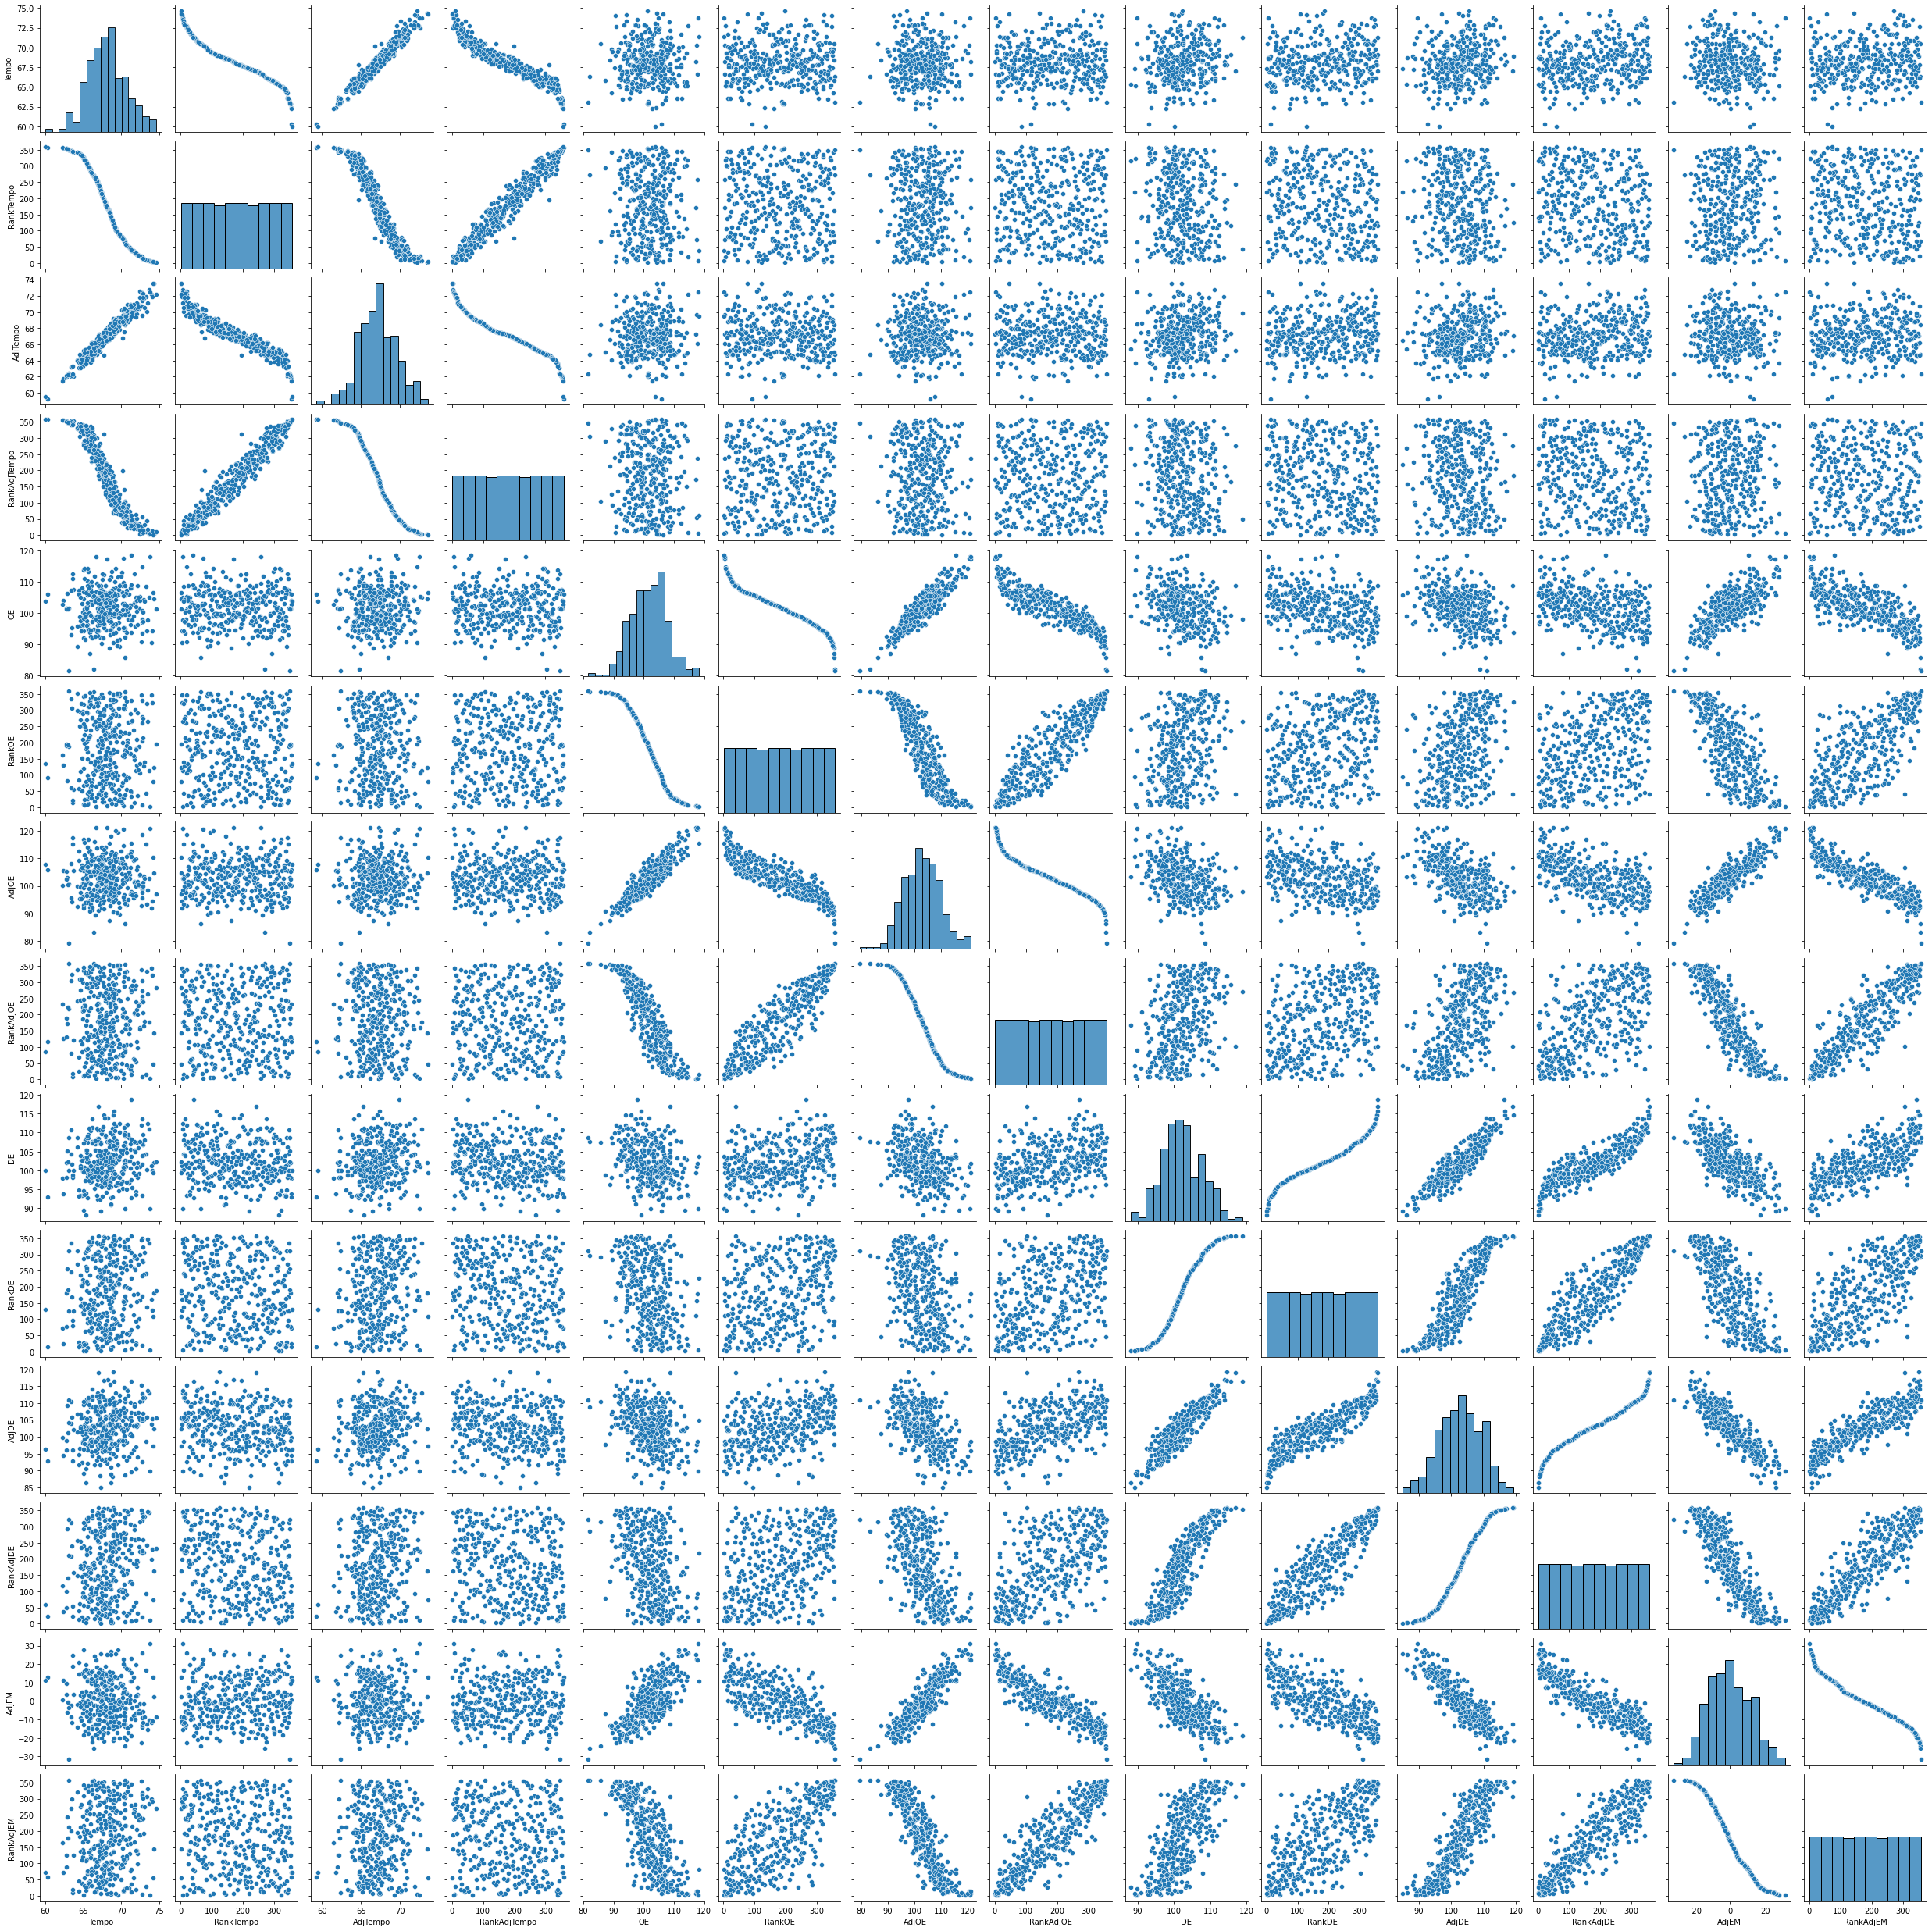

In [5]:
sns.pairplot(df)

<AxesSubplot:xlabel='AdjOE', ylabel='AdjDE'>

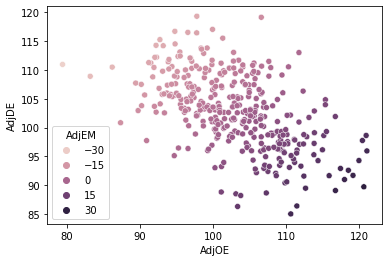

In [6]:
sns.scatterplot(x='AdjOE', y='AdjDE', hue='AdjEM', data=df)

<AxesSubplot:>

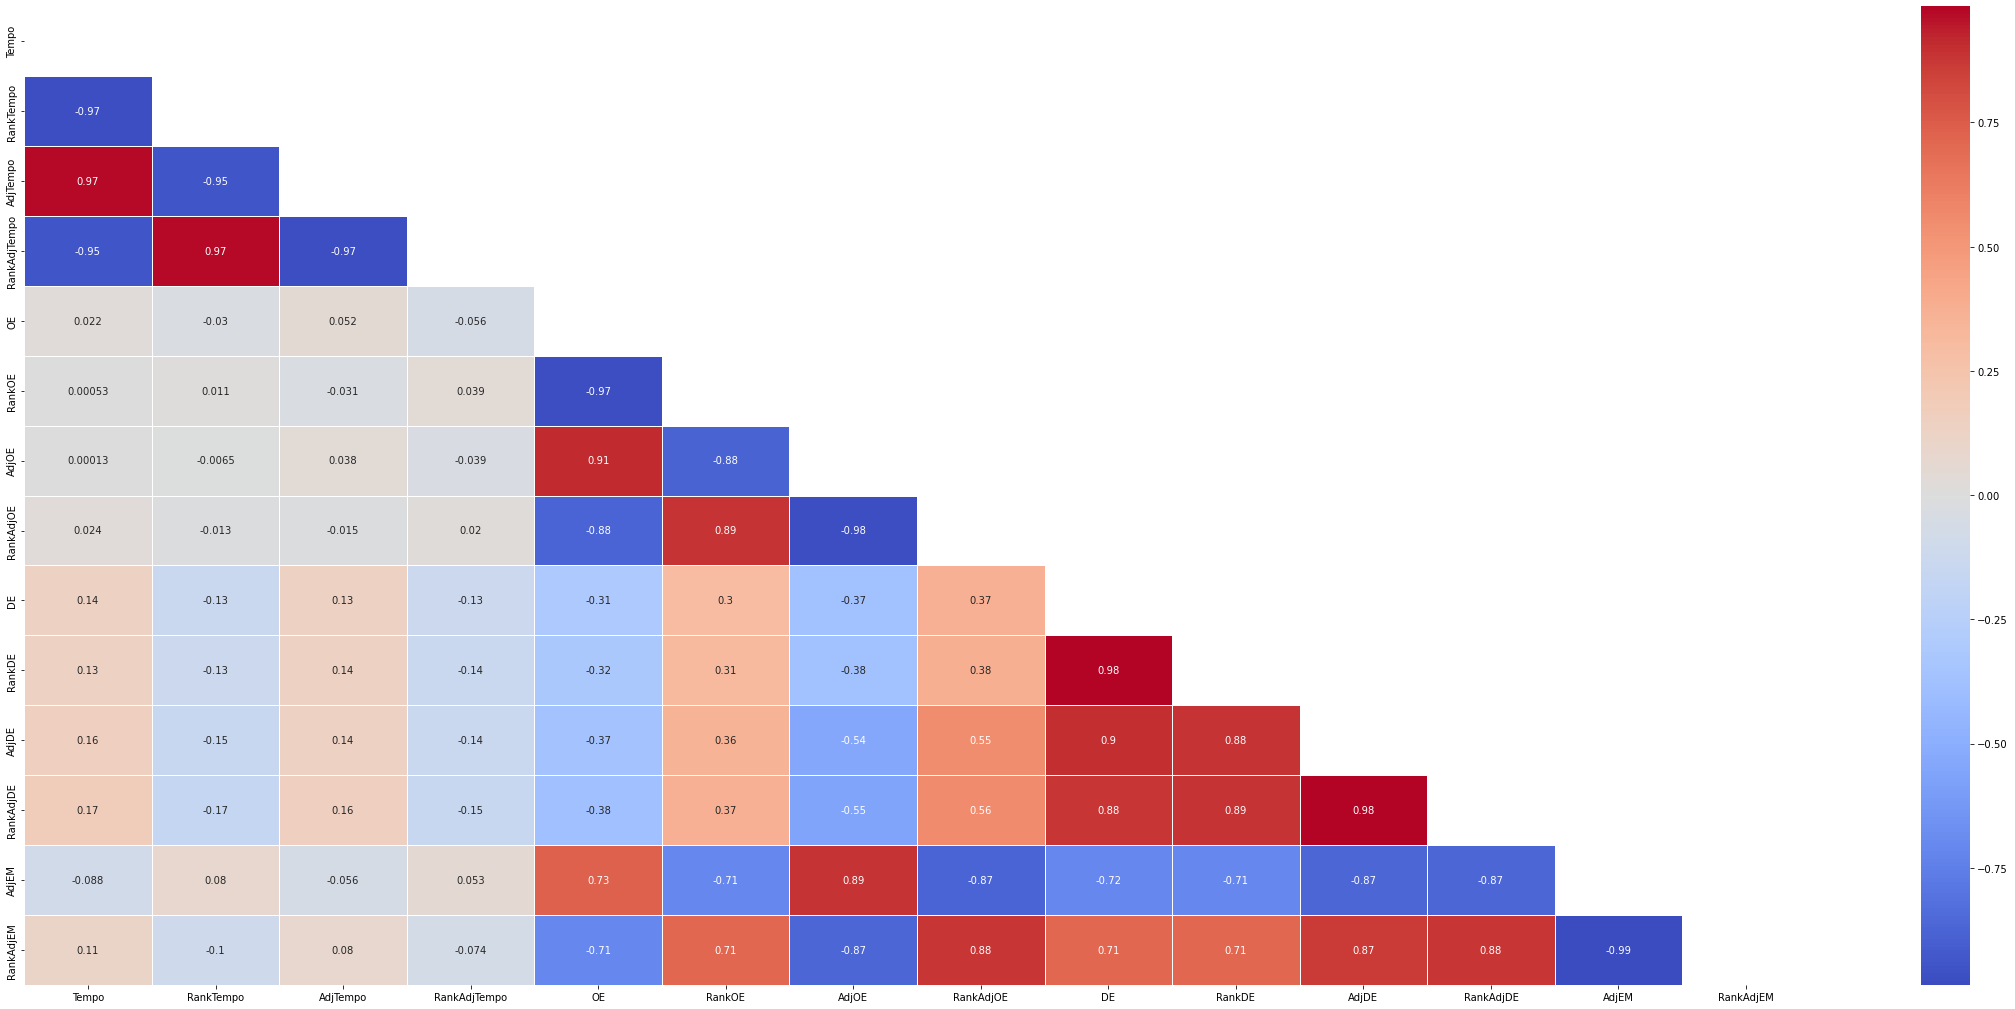

In [7]:
mask = np.zeros_like(df.corr())
corr = df.corr() 
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize =(40,18))
sns.heatmap(corr,mask = mask, annot=True,cmap='coolwarm', linewidth = .75)

In [8]:
df.dtypes

TeamName         object
Tempo           float64
RankTempo         int64
AdjTempo        float64
RankAdjTempo      int64
OE              float64
RankOE            int64
AdjOE           float64
RankAdjOE         int64
DE              float64
RankDE            int64
AdjDE           float64
RankAdjDE         int64
AdjEM           float64
RankAdjEM         int64
dtype: object

In [9]:
X = df[['AdjTempo','AdjOE','AdjDE','AdjEM']]

In [10]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

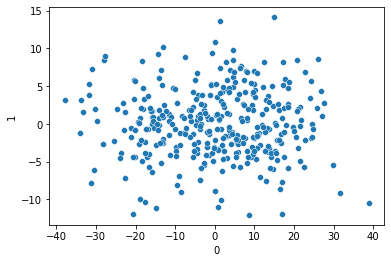

In [11]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<AxesSubplot:xlabel='0', ylabel='1'>

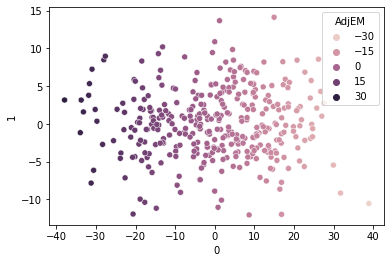

In [12]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.AdjEM)

In [13]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

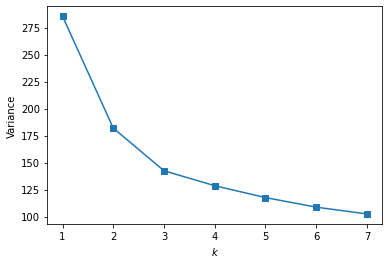

In [14]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [15]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

In [16]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

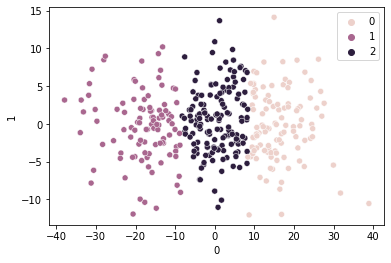

In [17]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot:xlabel='AdjOE', ylabel='AdjDE'>

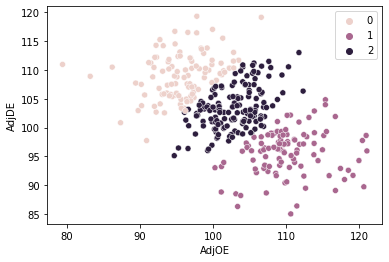

In [18]:
sns.scatterplot(x = df['AdjOE'], y = df['AdjDE'], hue=y)

In [19]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([df, y_df], axis=1)

In [20]:
new_df

TeamName    Tempo  RankTempo  AdjTempo  RankAdjTempo        OE  \
0    Abilene Christian  71.1340         47   70.3257            37  102.4850   
1            Air Force  63.4280        347   63.2371           342   92.9406   
2                Akron  63.6546        343   62.0843           352  107.3680   
3              Alabama  73.2690         10   71.9053            11  108.5320   
4          Alabama A&M  68.3935        162   66.5795           212   88.6957   
..                 ...      ...        ...       ...           ...       ...   
353         Wright St.  69.7225         88   68.8552            85  108.6820   
354            Wyoming  66.0907        279   66.0688           239  106.7960   
355             Xavier  69.1896        110   68.5833           100  105.7530   
356               Yale  70.2089         75   68.8235            88  101.0640   
357     Youngstown St.  67.0545        239   66.6391           207  106.3960   

     RankOE     AdjOE  RankAdjOE        DE  RankDE     AdjDE  RankAdjDE  \
0       166  104.0550        157   96.9711      59  100.6790        128   
1       334   95.5363        306  104.3160     246  104.0210        208   
2        55  105.6420        121   99.9099     124  102.0200        158   
3        44  115.1820         16  104.2540     241   98.6141         92   
4       354   87.3290        355   96.2221      45  100.8300        130   
..      ...       ...        ...       ...     ...       ...        ...   
353      37  106.3140        110  103.6090     225  106.5900        253   
354      66  109.1140         67   98.0097      75   97.1771         71   
355      97  111.2000         37   99.0926     101   97.8410         82   
356     200  100.7390        218   99.0814      99   98.7569         98   
357      75  102.8350        177  105.0520     254  110.3280        310   

         AdjEM  RankAdjEM  Cluster  
0     3.375700        131        2  
1    -8.484280        269        0  
2     3.622460        126        2  
3    16.567700         28        1  
4   -13.501100        314        0  
..         ...        ...      ...  
353  -0.276113        172        2  
354  11.936600         65        1  
355  13.358600         53        1  
356   1.982560        147        2  
357  -7.493370        254        0  

[358 rows x 16 columns]

In [21]:
pca_df

0          1
0    -4.085651  -0.333147
1    10.457625  -4.611397
2    -4.516816   0.559516
3   -20.379421   5.858604
4    16.829676 -11.982299
..         ...        ...
353   0.229301   5.283675
354 -14.634518  -0.078666
355 -16.399444   2.157016
356  -2.302875  -4.170122
357   9.039824   5.359334

[358 rows x 2 columns]

In [22]:
import plotly.express as px

In [23]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['TeamName','RankAdjOE','RankAdjDE','RankAdjEM'])
fig.show()

In [24]:
X = df[['AdjTempo','AdjOE','AdjDE','AdjEM']]

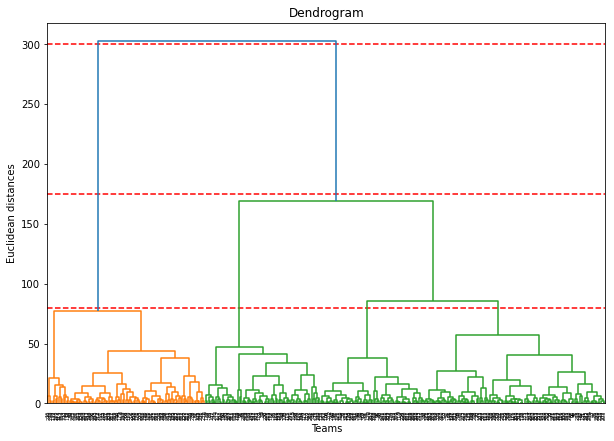

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Teams')
plt.ylabel('Euclidean distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.axhline(y=175, color='r', linestyle='--')
plt.axhline(y=300, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [26]:
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 

In [27]:
y_agglo = agglo.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

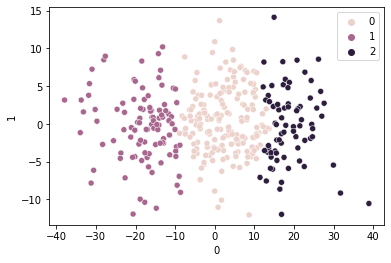

In [28]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)

<AxesSubplot:xlabel='0', ylabel='1'>

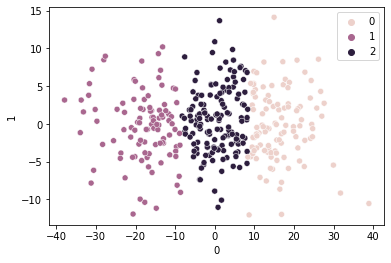

In [29]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [30]:
y_a_df = pd.DataFrame(y_agglo, columns=['Cluster (Agglomerative)'])
new_a_df = pd.concat([df, y_a_df], axis=1)

In [31]:
fig = px.scatter(pd.concat([new_a_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster (Agglomerative)', hover_data=['TeamName','RankAdjOE','RankAdjDE','RankAdjEM'])
fig.show()

In [34]:
new_df['Cluster'].value_counts()

2    148
0    108
1    102
Name: Cluster, dtype: int64

In [35]:
new_a_df['Cluster (Agglomerative)'].value_counts()

0    183
1    101
2     74
Name: Cluster (Agglomerative), dtype: int64